In [16]:
# load necessary libraries
library(DBI)
library(corrgram)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

In [17]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

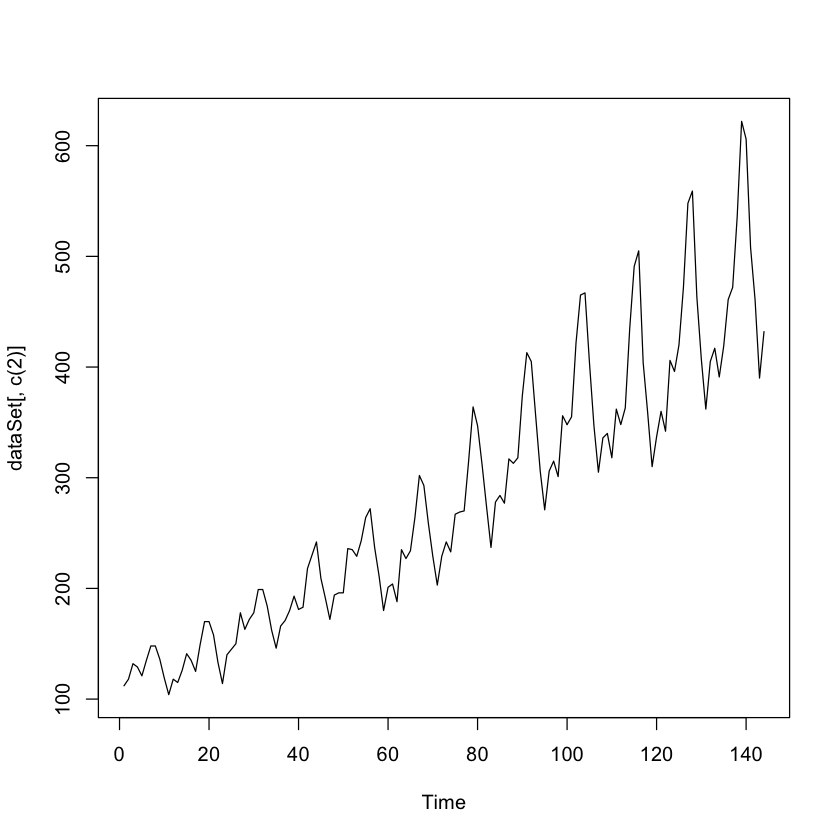

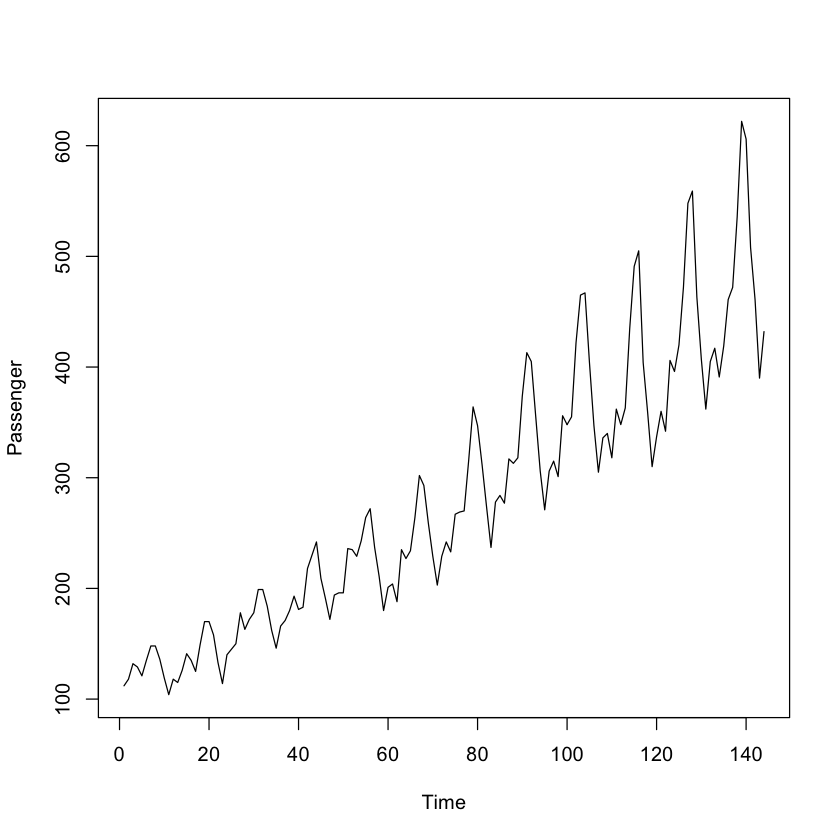

In [18]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [19]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

# Create "x" variable as row numbers / names
names(dataSet) <- 1:length(dataSet)

df <- cbind(read.table(text = names(dataSet)), dataSet)
x = df$V1; y = df$dataSet

In [20]:
# Define the Polynomial model: y ~ poly(x,2, raw = TRUE)
Model = lm(y ~ poly(x,2, raw = TRUE))

# Summarise the fitted model 
summary(Model)


Call:
lm(formula = y ~ poly(x, 2, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-100.353  -27.339   -7.442   21.603  146.116 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.124e+02  1.138e+01   9.872  < 2e-16 ***
poly(x, 2, raw = TRUE)1 1.641e+00  3.625e-01   4.527 1.26e-05 ***
poly(x, 2, raw = TRUE)2 7.008e-03  2.421e-03   2.894  0.00441 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.91 on 141 degrees of freedom
Multiple R-squared:  0.8618,	Adjusted R-squared:  0.8599 
F-statistic: 439.8 on 2 and 141 DF,  p-value: < 2.2e-16


In [21]:
# Summarise the r_squared for actual and fitted data 
r2 <- cor(fitted(Model), y)^2
summary(Model)$r.squared 
print(r2)

[1] 0.8618453

[1] 0.8618453


In [22]:
# Generate the trendline and fitted values
tendency  = coef(Model)[[3]] * x^2 + coef(Model)[[2]] * x + coef(Model)[[1]]
print(tendency)

  [1] 114.0280 115.6901 117.3661 119.0561 120.7602 122.4783 124.2104 125.9565
  [9] 127.7167 129.4908 131.2790 133.0812 134.8974 136.7276 138.5718 140.4301
 [17] 142.3023 144.1886 146.0889 148.0032 149.9316 151.8739 153.8303 155.8006
 [25] 157.7850 159.7835 161.7959 163.8223 165.8628 167.9173 169.9858 172.0683
 [33] 174.1648 176.2753 178.3999 180.5385 182.6911 184.8577 187.0383 189.2330
 [41] 191.4416 193.6643 195.9010 198.1517 200.4164 202.6952 204.9879 207.2947
 [49] 209.6155 211.9503 214.2991 216.6620 219.0388 221.4297 223.8346 226.2535
 [57] 228.6864 231.1333 233.5943 236.0693 238.5582 241.0613 243.5783 246.1093
 [65] 248.6544 251.2134 253.7865 256.3736 258.9747 261.5899 264.2190 266.8622
 [73] 269.5194 272.1906 274.8758 277.5750 280.2883 283.0155 285.7568 288.5121
 [81] 291.2814 294.0648 296.8621 299.6735 302.4989 305.3383 308.1917 311.0591
 [89] 313.9405 316.8360 319.7455 322.6690 325.6065 328.5580 331.5236 334.5031
 [97] 337.4967 340.5043 343.5259 346.5615 349.6112 352.6748 355.

In [23]:
# Generate the forecast in the future time horizon
steps = 25
x_in_Future <- (length(x)+1) : (length(x)+steps)

forecastedValues  = coef(Model)[[3]]  * x_in_Future^2 + coef(Model)[[2]]  * x_in_Future + coef(Model)[[1]]; print(forecastedValues)

 [1] 497.6717 501.3521 505.0465 508.7549 512.4773 516.2138 519.9642 523.7287
 [9] 527.5072 531.2997 535.1063 538.9268 542.7614 546.6099 550.4725 554.3491
[17] 558.2398 562.1444 566.0631 569.9957 573.9424 577.9031 581.8779 585.8666
[25] 589.8694


In [24]:
# Plotting Observed versus Predicted
res <- stack(data.frame(Observed = c(y,forecastedValues), 
                        Predicted = c(tendency, forecastedValues)))
res <- cbind(res, x = rep(c(x,x_in_Future) , 2))

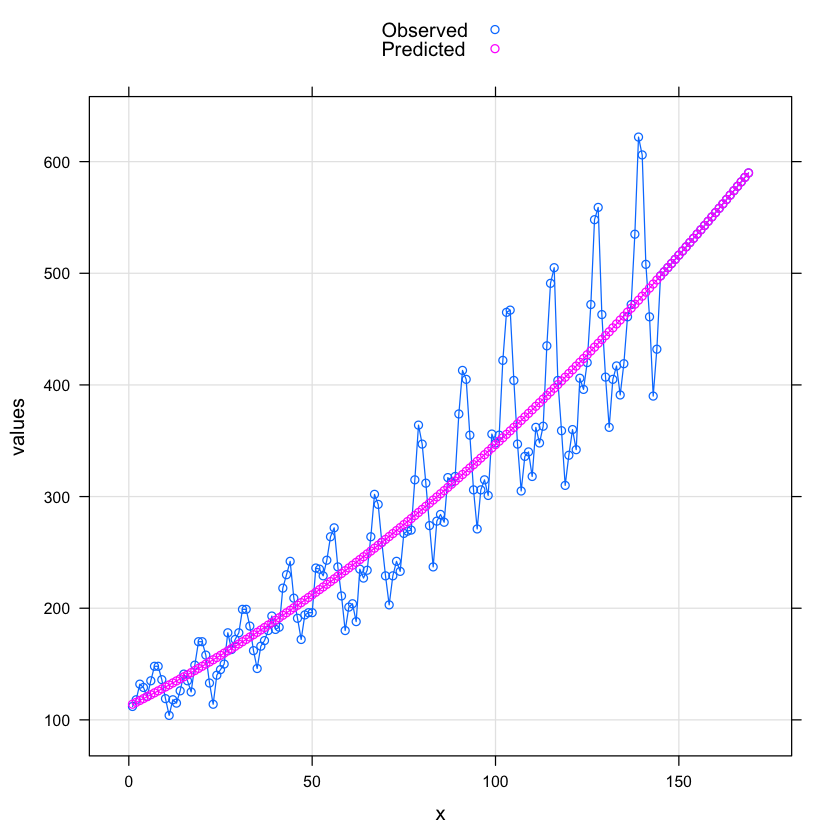

In [25]:
require("lattice")
g1 <- xyplot(values ~ x, data = res, group = ind, auto.key = TRUE, grid = TRUE,
             type=c("p","l"))

library(gridExtra)
grid.arrange(g1, nrow = 1)